<a href="https://colab.research.google.com/github/xiborxu/IST462xibo/blob/main/IST462_Final_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '20'>**Crashing Data Report** </font>

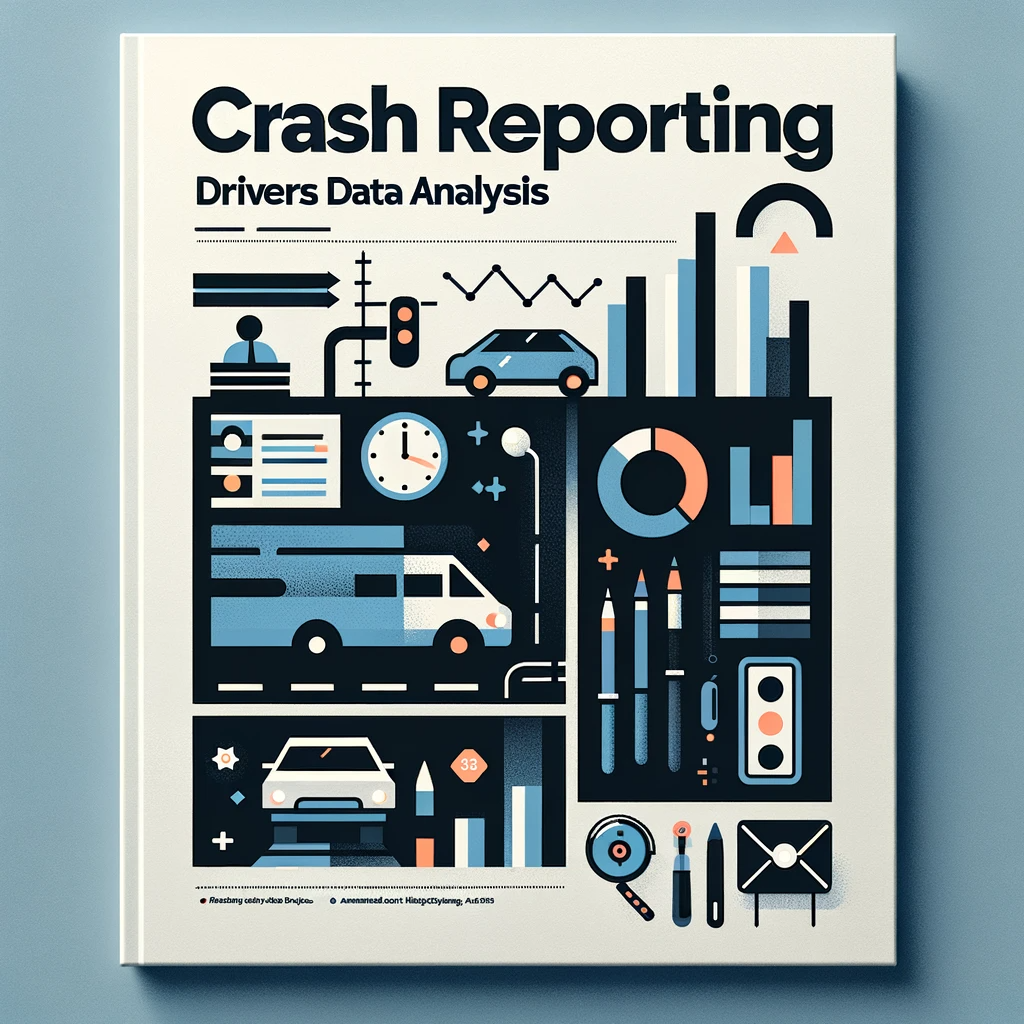

source: https://catalog.data.gov/dataset/crash-reporting-drivers-data


The dataset contains the information of traffic collision happened on Montgomery County, Maryland. The data is reported by mutliple agencies including Montgomery County Police, Gaithersburg Police, Rockville Police, or the Maryland-National Capital Park Police. The data that these collision reports are based on preliminary information supplied to the Police Department by the reporting parties. Therefore, a subjective information and error is possible.

By conducting this project, we hope to help policy-makers gain a better understanding of traffic collision patterns and thus facilitate proactive measures for risk and safety management in the county. On the business side, the iinsurance company may consider this as a valuable information for their auto insurance business.

Please note that because the data is only collected from Montgomery County, Maryland. Any conslusion from our report is valided at Montgomery County. The conslusion may not be accuracy when applied it into other places

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Crash_Reporting_-_Drivers_Data-2.csv')

In [ ]:
#url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSxw25lAmepqXjvvKOUWlaVo-3o3LdcmfOT-1ZoqQU2kdi79RPOAKX-713JFT7mUy7gmLKilTcFzA2n/pub?gid=762249656&single=true&output=csv"
#df = pd.read_csv(url)

<font size = '6'>**Data Cleaning**</font>

In [ ]:
df.shape # find the number of rows and columns in our data frame
         # this shows we have 168,157 rows data

In [ ]:
df.columns #check the columns of dataframe

In [ ]:
df.isnull().sum() # find out the number of missing value (null value)
                  # for some columns with significant values loss, drop them

In [ ]:
# draw the graph by cases number reported by each agency
import matplotlib.pyplot as plt
value_counts = df['Agency Name'].value_counts() # Count the values of each agency name
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Agency Name')
plt.ylabel('Report Value Counts')
plt.title('Report Cases by Agency Name')
plt.show()

In [ ]:
# draw the graph to find out the missing cases of each agency
df_missing = df[df['Non-Motorist Substance Abuse'].isna()]
# a subset from df, selecting the rows whose 'Non-Motorist Substance Abuse' column is missing
missing_values_count = df_missing['Agency Name'].value_counts()
# count the number of agency, that will be the time that agency miss the data
plt.figure(figsize=(12, 7))
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Agency Name')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values by Agency')
plt.show()

It turns out that the majority of the data is provided by Montgomery County Policy, while they also provide the most missing values.

The frist thing to do is to remove some data. This includes the personal information data (Report Name, Case Number, Person ID, Vehicle ID) and the column with a significant amount of loss that is no longer valubale for the analysis (Off-Road Description, Related Non-Motorist)

For the rest of the missing data, we find that most columns both have NAs and Unknown. We decide to convert the NAs to Unknown so we can process the data. Another column we pay attention is Vehicle Make that we find the agencies use different name for one Vehicle Make. For example they use "CHEV","CHEVY" for "CHEVROLET". Though we cannot guarantee that we convert all brand name correctly, the top 10 most frequent Vehicle Make is correct, and that is enough for our analysis.

In [ ]:
columns_drop = ['Road Name','Cross-Street Name','Report Number', 'Local Case Number', 'Off-Road Description', 'Municipality', 'Related Non-Motorist','Drivers License State', 'Non-Motorist Substance Abuse', 'Person ID', 'Circumstance','Vehicle ID']
# choose the columns we believe is useless
df = df.drop(columns_drop, axis=1)
#drop the columns

In [ ]:
columns_to_fill_UNKNOWN = ['Driver Substance Abuse', 'Traffic Control','Weather','Vehicle Damage Extent','Equipment Problems','Surface Condition','Collision Type','Light','Vehicle First Impact Location','Vehicle Second Impact Location','Vehicle Movement','Vehicle Make','Vehicle Model','Vehicle Body Type']
df[columns_to_fill_UNKNOWN] = df[columns_to_fill_UNKNOWN].fillna('UNKNOWN')
# previous columns have missing values and "UNKNOWN", so we convert the missing value into UNKNOWN

columns_to_fill_Unknown = ['Route Type','Cross-Street Type','Vehicle Continuing Dir','Vehicle Going Dir']
df[columns_to_fill_Unknown] = df[columns_to_fill_Unknown].fillna('Unknown')
# same above, covert to Unknown

In [ ]:
df['Vehicle Make'] = df['Vehicle Make'].replace('TOYT', 'TOYOTA')
df['Vehicle Make'] = df['Vehicle Make'].replace('HOND', 'HONDA')
df['Vehicle Make'] = df['Vehicle Make'].replace('CHEV', 'CHEVROLET')
df['Vehicle Make'] = df['Vehicle Make'].replace('CHEVY', 'CHEVROLET')
# we find that there are different name for Vehicle make, such as CHEV, CHEVY for CHEVROLET
# We decide to convert to same name
# though our method cannot totally avoid the problem, we can ensure the top 5 is correct,and that's enough for our analysis

In [ ]:
df.isnull().sum()
# no null values

Vehcile Damage Extent is our key columns. Hence we decide to remove all "Unknown" and "Other" in this columns for a better analysis. We still have a significant amount after removing them.

In [ ]:
df = df[df['Vehicle Damage Extent'] != 'UNKNOWN']
df = df[df['Vehicle Damage Extent'] != 'OTHER']
df.dropna(subset=['Vehicle Damage Extent'], inplace=True)
# the Vehicle Damage Extent is a key column
# We don't want any Unknown or other here; hence we drop them

<font size = '6'>**Crash Type Distribution**</font>

In [ ]:
# Draw the graph to show distribution of each damage extend
plt.figure(figsize=(8, 6))
df['Vehicle Damage Extent'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# Draw the graph for Crash Types
crash_type_counts = df['ACRS Report Type'].value_counts()
# create a subset from df and count the number of each value in ACRS Report Type
plt.figure(figsize=(8, 6))
plt.pie(crash_type_counts, labels=crash_type_counts.index,autopct='%1.1f%%', startangle=140)
# We draw a pie chart this time to find out the percentage of three types
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Crash Types')
plt.show()

<font size = '10'>**Analysis**</font>

<font size = '6'>**Does Weather Make an Impact?**</font>

This section categorizes vehicle damage into four distinct levels: 'Destroyed', 'Disabling', 'Functional', and 'No Damage'. Observing the chart above, one might anticipate notable variations in weather conditions across these different damage. The distribution of weather types across different proportions of accident damage is remarkably uniform, suggesting that regardless of the severity of the damage in accidents, the distribution of weather conditions remains constant and consistent. This finding challenges the conventional belief about the impact of weather on accidents and implies that other factors may play a more critical role in the extent of damage sustained.




In [ ]:
# draw the graph of damage count by damaged level in different weather conditions
grouped = df.groupby(['Vehicle Damage Extent', 'Weather']).size().unstack(fill_value=0)
# groupby the Vehicle Damage Extent and weather and count the size
grouped.plot(kind='bar', stacked=True, figsize=(8, 6),colormap = 'tab10')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Damage Extent by Weather')
plt.legend(title='Damage Extent',bbox_to_anchor=(1.45, 1), loc='upper right')

In [ ]:
rain_data = df[df['Weather'] == 'RAINING']
snow_data = df[df['Weather'] == 'SNOW']
foggy_data = df[df['Weather'] == 'FOGGY']
# create new datasets to find cases in three conditions (rain, fog, snow)

In [ ]:
# draw the rain map
import plotly.express as px
# Plotting crash locations on an interactive map using Plotly
fig = px.scatter_mapbox(rain_data,
                        # database
                        lat="Latitude",
                        lon="Longitude",
                        mapbox_style= "carto-positron",
                        # set the visual style of background
                        color_discrete_sequence=["skyblue"], # Color for rain
                        title="Crash Locations by Weather Conditions",
                        zoom=8)
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()

In [ ]:
# draw the snow map
fig_snow = px.scatter_mapbox(snow_data,
                             lat="Latitude",
                             lon="Longitude",
                             mapbox_style="carto-positron",
                             color_discrete_sequence=["Black"], # Color for snow
                             title="Snow Accidents",
                             zoom=8)
fig_snow.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_snow.show()

In [ ]:
# draw the fog map
fig_foggy = px.scatter_mapbox(foggy_data,
                              lat="Latitude",
                              lon="Longitude",
                              mapbox_style="carto-positron",
                              color_discrete_sequence=["grey"], # Color for foggy
                              title="Foggy Accidents",
                              zoom=8)
fig_foggy.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig_foggy.show()

In [ ]:
destroyed_df = df[df['Vehicle Damage Extent'] == 'DISABLING']
percentage_destroyed = (destroyed_df['Weather'].value_counts() / len(destroyed_df)) * 100
# Calculate the percentage of each weather condition
threshold = 5
percentage_destroyed_others = percentage_destroyed[percentage_destroyed >= threshold]
percentage_destroyed_others['Others'] = percentage_destroyed[percentage_destroyed < threshold].sum()
# Define a threshold value for the percentage,# Filter out the weather conditions that are less than the threshold percentage and aggregate them into an 'Others' category
plt.figure(figsize=(8, 6))
plt.pie(percentage_destroyed_others, labels=percentage_destroyed_others.index, autopct='%1.1f%%', startangle=140)
# Create a pie chart of the weather conditions that meet or exceed the threshold
plt.axis('equal')
plt.title('Weather Distribution for "Disabling" Damage Level')
plt.show()

<font size = '6'>**Does Road Condition Make an Impact?**</font>

This section examines the correlation between speed limits and the frequency of accidents. The data visualized in the bar chart identifies the top five speed limits where most accidents occur. Intriguingly, the highest number of accidents is associated with the 35 MPH speed limit, followed by a significant drop as the speed limit increases to 40 MPH and above. This trend highlights the need for further investigation into the factors that contribute to higher accident rates at specific speed thresholds.

In [ ]:
speed_limit_counts = df['Speed Limit'].value_counts()
## Count the occurrence of each unique speed limit
top_5_speed_limits = speed_limit_counts.head(5)
top_5_speed_limits = top_5_speed_limits.sort_index()
# Select the top 5 speed limits and ascending order
plt.figure(figsize=(8, 6))
top_5_speed_limits.plot(kind='bar')
# Create a bar plot
plt.xlabel('Speed Limit (MPH)')
plt.ylabel('Number of Accidents')
plt.title('Top 5 Speed Limits with Most Accidents')
plt.xticks(rotation='horizontal')
plt.show()

This will analyze collision rates based on the different types of traffic control mechanisms recorded in the dataset. The resulting bar chart effectively visualizes the distribution of collision frequency by different traffic control types. In this way, insights can be gained into the relative incidence of crashes affected by different traffic control measures, thus enabling departments and stakeholders to identify areas or mechanisms that require further attention or improvement in road safety measures.

In [ ]:
#take the column related to traffic control
traffic_control_data = df['Traffic Control']
# Statistics on the number of collisions for each mode of traffic control
traffic_control_counts = traffic_control_data.value_counts()

# Plotting a bar chart for Frequency of Crashes Based on Traffic Control
plt.figure(figsize=(8, 6))
traffic_control_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Crashes Based on Traffic Control')
plt.xlabel('Traffic Control')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see that more than eighty percent of collisions occur when the road surface is dry. And twenty percent occur when the roadway is wet. The Pie-chart is somewhat proportionally distributed according to the weather conditions.

In [ ]:
# draw a pie chart to find out the surface condition in most frequent miles limit
filtered_df = df[df['Speed Limit'] == 35]
# choose all of accidents on road whose speed limit is 35m
surface_condition_percentage = (filtered_df['Surface Condition'].value_counts() / len(filtered_df)) * 100
# calculate the percentage of each road conditions
threshold = 2
small_parts = surface_condition_percentage[surface_condition_percentage < threshold]
surface_condition_percentage['Others'] = small_parts.sum()
surface_condition_percentage = surface_condition_percentage[surface_condition_percentage >= threshold]
'''
'''
# Create a pie chart for the specified speed limit and surface conditions
plt.figure(figsize=(8, 6))
plt.pie(surface_condition_percentage, labels=surface_condition_percentage.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(f'Surface Condition Distribution for 35 MPH')
plt.show()

The observation that a majority of collisions occur at intersections is significant. Intersections are points where two or more roads meet, and they often involve complex driving maneuvers like turning, yielding, and stopping. Wet conditions can exacerbate the risks at intersections due to reduced tire traction and increased stopping distances.

The concentration of collisions on town roads, as opposed to highways, could indeed be attributed to higher traffic volumes in these areas. The lower number on highways might be due to fewer intersections and more consistent traffic flows. However, it's also important to consider that while there might be fewer collisions, accidents on highways can be more severe due to higher speeds.

In [ ]:
wet_surface_accidents = df[df['Surface Condition'] == 'WET']

# Plotting crash locations on an interactive map using Plotly
fig = px.scatter_mapbox(wet_surface_accidents,
                        lat="Latitude",
                        lon="Longitude",
                        mapbox_style="carto-positron",  # Choose map style
                        title="Accidents on Wet Surface Conditions",
                        zoom=8,  # Set initial zoom level
                        color_discrete_sequence=["orange"])  # Color for wet surface accidents
# Adjust layout
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

<font size = '6'>**Does Vehicle Make an Impact?**</font>

In [ ]:
df['Vehicle Make'].value_counts().head(5)
# counts the value of top 5 vehicle make

In this step, I counted the five most common car brands in collisions. As you can see Toyota comes in at number one. However, according to Statista's U.S. car ownership data, Toyota is not the most popular car brand in the United States.

Toyota is known for the durability and longevity of its vehicles. There may be a larger number of older Toyota vehicles still in use, increasing the likelihood of these vehicles being involved in collisions.


In [ ]:
df['Vehicle Year'].value_counts().head(5)
# counts the value of top 5 vehicle year


Source: https://www.statista.com/forecasts/997226/car-ownership-by-make-brand-in-the-us

This graph shows the distribution of the years of each brand of vehicle involved in collisions. The conclusion is that there is no significant difference in the distribution of Toyota compared to other brands, so durability is not the reason why Toyota is most heavily represented in the crash data.

This could be due to regional preferences. Toyota may not be the most popular brand nationwide, but it may be particularly popular in the specific regions where crash data is collected.

We still need more research on this point before we can come to a conclusion.



In [ ]:
def categorize_year(year):
    if year >= 2020:
        return '2020-2023'
    elif year >= 2017:
        return '2017-2020'
    elif year >= 2012:
        return '2012-2017'
    elif year >= 2008:
        return '2008-2012'
    elif year >= 2000:
        return '2000-2008'
    else:
        return '2000 and before'

df['Year Range'] = df['Vehicle Year'].apply(categorize_year)
# create a new columns containing the bin of year
selected_makes = ['TOYOTA', 'HONDA', 'FORD', 'CHEVROLET', 'NISSAN']
# select the top 5 vehicle make
filtered_df = df[df['Vehicle Make'].isin(selected_makes)]
# filter a new df whose Vehicle Make is one of 5 mentioned previously
grouped = filtered_df.groupby(['Vehicle Make', 'Year Range']).size().unstack(fill_value=0)
# groupby vehcile Make and Year range, count the number
percentage_grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100
#  calculates the sum of values along each row and perform the division
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
# draw the graph
plt.xlabel('Vehicle Make')
plt.ylabel('Percentage (%)')
plt.title('Year Range Distribution by Vehicle Make')
plt.legend(title='Year Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

In this section, I analyze the extent of post-crash damage to each brand of vehicle. From here, it appears that Ford is the safest of the five brands, with overall less damage after a collision.

In [ ]:
top_5_brands = df['Vehicle Make'].value_counts().head(5).index.tolist()

# Filter the data for the top 5 brands
filtered_df = df[df['Vehicle Make'].isin(top_5_brands)]
grouped = filtered_df.groupby(['Vehicle Make', 'Vehicle Damage Extent']).size().unstack(fill_value=0)
percentage_grouped = grouped.div(grouped.sum(axis=1), axis=0) * 100
# Calculate the percentage for each damage extent level within each brand
# draw the graph
ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Brand')
plt.ylabel('Percentage (%)')
plt.title('Damage Extent Distribution for Top 5 Brands')
plt.legend(title='Damage Extent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

A serious collision can result in death, which is an irreparable loss. In this map, I have marked all collisions that resulted in fatalities. Here are the FATAL accident-prone roads.

-The intersection of Georgia Avenue and May Street.
-T-Junction of Georgia Avenue and Hewitt Avenue
-New Hampshire Avenue and Capital Beltway.
-Wood Field Road into Saybrooke Oaks Boulevard.

And more...

We hope these findings will help local agencies to reduce the number of potentially fatal crashes in the future.


In [ ]:
fatal_crashes = df[df['ACRS Report Type'] == 'Fatal Crash']

# Plotting crash locations on an interactive map using Plotly
fig = px.scatter_mapbox(fatal_crashes,
                        lat="Latitude",
                        lon="Longitude",
                        mapbox_style="carto-positron",  # Choose map style
                        title="Locations of Fatal Crashes",
                        zoom=8,
                        color_discrete_sequence=["red"])
#Adjust layout
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

<font size = '8'> **Does Time Make an Impact?** </font>

The graphs drawn illustrate the distribution of collisions in different months and years. This analysis helps to identify potential patterns or trends in collisions throughout the year, as well as from year to year, providing insights into traffic management strategies.

In [ ]:
# Convert 'Crash Date/Time' column to datetime format in the copied dataframe
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

# Extract year from 'Crash Date/Time' column and create a new column 'Year'
df['Year'] = df['Crash Date/Time'].dt.year

# Group by 'Year' and count occurrences
yearly_crash_count = df['Year'].value_counts().sort_index()

# Plotting time-series data for yearly crash occurrences
plt.figure(figsize=(10, 6))
plt.plot(yearly_crash_count, marker='o', color='orange')

plt.title('Crash Occurrences Over Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.tight_layout()
plt.show()

# Crash Occurrences for each month across all years
Taking into account all the available data in the dataset, the graphs drawn illustrate the distribution of collisions in different months. As can be seen from the visual graph, collisions occur more frequently in September and October compared to other months. This analysis helps to identify potential patterns or trends in collisions throughout the year, providing insights that can help to target safety measures or traffic management strategies in specific months.

In [ ]:
# Extract month from 'Crash Date/Time' column and create a new column 'Month'
df['Month'] = df['Crash Date/Time'].dt.month

# Group by 'Month' and count occurrences across all years
monthly_crash_count = df['Month'].value_counts().sort_index()

# Create a bar plot for Crash Occurrences for each month across all years
plt.figure(figsize=(10, 6))
monthly_crash_count.plot(kind='bar', color='skyblue')

plt.title('Crash Occurrences for Each Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=0)
plt.show()

<font size = '6.5'> **Machine Learning: Which Factor is Most Important?**</font>

In [ ]:
df.dtypes

In [ ]:
# LabelEncoder to convert the object to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns: # convert all object columns to integer
    df[column] = le.fit_transform(df[column])
df

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')
# correlation map

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['Weather','Speed Limit','Surface Condition','Vehicle Year','Vehicle Make','Traffic Control','Year','Month']]
# identify the key factors we used before
y = df['Vehicle Damage Extent']
# select the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# split the data set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
# train the decision tree model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# use the trained model to predict the x-test
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

In [ ]:
# feature importance analysis
importances = clf.feature_importances_
for idx, importance in enumerate(importances):
    print(f"Feature {idx + 1}: {importance:.4f}")
print('Feature 4 (Vehciel Year) and Feature 8 (Month) is most important feature.')
print('Feature 5(Vehicle Make), Feature 7(Year), and Feature 2 (Speed Limit) are related important.')

In [ ]:
feature_names = X.columns

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()